Visualize a single experiment.

In [6]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import json
from sklearn.linear_model import LinearRegression
import numpy as np

In [136]:
with open('experiments_log.json', 'r') as file:
    experiments = json.loads(file.read())

print(experiments.keys())

print(experiments['linear_model_3_input_20']['function'])

print(experiments['linear_model_3_input_20']['input_text'])


dict_keys(['linear_model_1_input_15', 'linear_model_1_input_5', 'linear_model_1_input_8', 'linear_model_2_input_15', 'linear_model_3_input_20', 'quadratic_model_1_input_25', 'quadratic_model_2_input_25', 'quadratic_model_2_input_25_smaller_variance', 'quadratic_model_2_input_25_smaller_variance_bigger_range', 'sine_input_15', 'sine_input_30'])
    def function(x):
        x = 44*x + 201 + norm.rvs(loc=0, scale=600, size=1, random_state=None)[0]
        x = round(x)
        return x

This is a sequence of inputs and outputs of a function which takes an integer as an argument and returns an integer.
Input = 55, output = 2727
Input = 65, output = 3671
Input = 70, output = 3988
Input = 43, output = 2372
Input = 68, output = 3539
Input = 66, output = 3338
Input = 58, output = 2902
Input = 62, output = 3191
Input = 46, output = 2062
Input = 52, output = 2349
Input = 42, output = 2453
Input = 54, output = 2945
Input = 61, output = 2556
Input = 48, output = 1906
Input = 60, output = 2332
Input

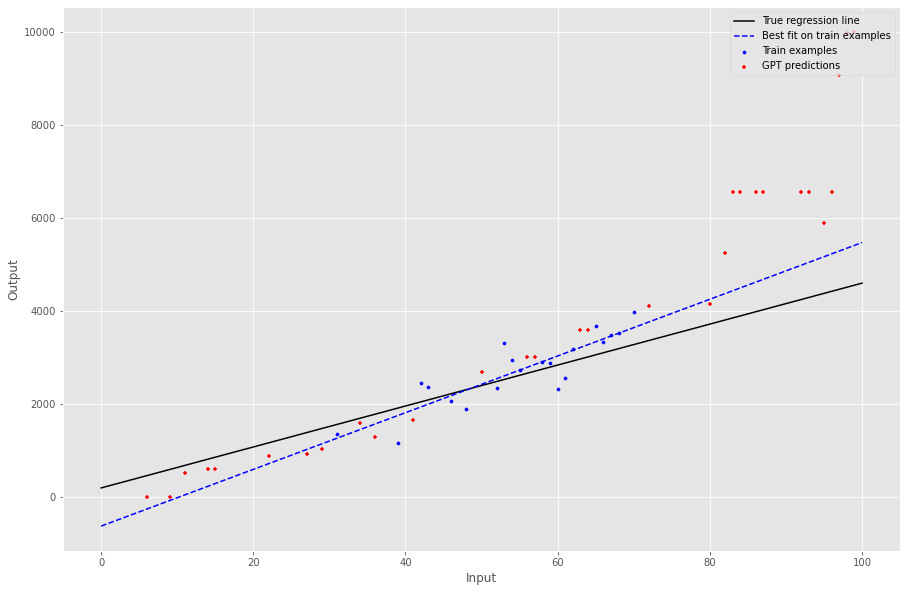

In [137]:
experiment_name = 'linear_model_3_input_20'

experiment = experiments[experiment_name]

x_train, y_train = experiment['input_train'], experiment['output_train']
x_test, y_test = experiment['input_test'], experiment['output_test_cleaned']

train_implied_lm = LinearRegression().fit(np.array(x_train).reshape(-1, 1),
                                            y_train)
test_implied_lm = LinearRegression().fit(np.array(x_test).reshape(-1, 1),
                                            y_test)



fig, ax = plt.subplots(figsize=(15,10))

ax.scatter(x_train, y_train, s=10, c='b', marker="o", label='Train examples')
ax.scatter(x_test, y_test, s=10, c='r', marker="+", label='GPT predictions')

# quadratic_model_1_input_25:
#ax.plot([0, 100], [201, 44*100 + 201], c='black', label='True regression line')


points = np.linspace(0, 100, 200)
def fn(x):
    x = 44*x + 201
    x = round(x)
    return x

fn = np.vectorize(fn)

plt.plot(points, fn(points), color='black', label="True regression line")

ax.plot([0, 100], [train_implied_lm.intercept_,
                    train_implied_lm.coef_[0]*100 + train_implied_lm.intercept_],
            ls='--', color='b', label="Best fit on train examples")

#ax.plot([0, 100], [test_implied_lm.intercept_,
#                    test_implied_lm.coef_[0]*100 + test_implied_lm.intercept_],
#            ls='--', color='r', label="Best fit of GPT predictions")
ax.set_xlabel("Input")
ax.set_ylabel("Output")
plt.legend(loc='upper right')
plt.show()


In [56]:
linear_model_preds = train_implied_lm.predict(np.array(x_test).reshape(-1, 1))
ground_truth = fn(x_test)

In [63]:
from sklearn.metrics import mean_absolute_error

In [64]:
print(mean_absolute_error(linear_model_preds, ground_truth))
print(mean_absolute_error(y_test, ground_truth))

33.84522396385851
35.5


In [65]:
from sklearn import datasets

iris = datasets.load_iris()

In [74]:
# take 20 samples from each class
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [77]:
'examples are {}, {}, {}, {}'.format(iris['data'][iris['target'] == 1][3])

IndexError: Replacement index 1 out of range for positional args tuple

In [84]:
transformed = 14*iris['data'] + 6

In [86]:
transformed = np.vectorize(round)(transformed)

In [89]:
y = iris.target

In [87]:
from sklearn.model_selection import train_test_split

In [94]:
x_train, x_test, y_train, y_test = train_test_split(transformed, y, test_size=0.6, stratify=y)

In [118]:
input_text = 'This is a sequence of inputs and outputs of a function which takes four integers as inputs and returns one of the 0, 1, 2.\n'
for x, y in zip(x_train, y_train):
    input_text += 'Inputs: {}, {}, {}, {}, output = {}\n'.format(*(tuple(x)+tuple([y])))

In [120]:
print(input_text)

This is a sequence of inputs and outputs of a function which takes four integers as inputs and returns one of the 0, 1, 2.
Inputs: 114, 45, 100, 34, output = 2
Inputs: 86, 41, 76, 34, output = 2
Inputs: 90, 37, 76, 27, output = 2
Inputs: 100, 52, 86, 41, output = 2
Inputs: 94, 52, 90, 41, output = 2
Inputs: 112, 48, 98, 35, output = 2
Inputs: 94, 45, 77, 27, output = 2
Inputs: 77, 54, 27, 9, output = 0
Inputs: 76, 55, 24, 10, output = 0
Inputs: 73, 54, 33, 9, output = 0
Inputs: 76, 34, 55, 20, output = 1
Inputs: 82, 58, 27, 9, output = 0
Inputs: 114, 59, 100, 37, output = 2
Inputs: 79, 54, 26, 9, output = 0
Inputs: 70, 54, 26, 10, output = 0
Inputs: 94, 47, 84, 31, output = 2
Inputs: 93, 47, 66, 24, output = 1
Inputs: 73, 49, 28, 9, output = 0
Inputs: 83, 65, 26, 9, output = 0
Inputs: 90, 54, 69, 28, output = 1
Inputs: 107, 48, 87, 28, output = 2
Inputs: 87, 45, 77, 40, output = 2
Inputs: 91, 45, 62, 24, output = 1
Inputs: 98, 47, 70, 24, output = 1
Inputs: 70, 56, 20, 9, output = 0
In